In [10]:
!pip install -q geopy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [6]:
import numpy as np
from geopy.distance import geodesic

# Estimated GPS coordinates for the specified Moscow Metro stations
# Format: "Station Name": (Latitude, Longitude)
stations_coordinates = {
    "Fizteh": (55.5518, 37.3247),           # Estimated coordinates for Fizteh
    "Chkalovskaya": (55.4523, 37.3926),
    "Slavyanski Boulevard": (55.4347, 37.2814),
    "Park Kultury": (55.4409, 37.3529),
    "Komsomolskaya": (55.4629, 37.3918),
    "Yugo-Zapadnaya": (55.3949, 37.2900),
    "Kievskaya": (55.4440, 37.3356),
    "Strogino": (55.4814, 37.2411),
    "Konkovo": (55.3800, 37.3108),
    "VDNKh": (55.4916, 37.3828),
    "Tekstilshiki": (55.4232, 37.4354)
}

# Calculate the pairwise distance matrix
def calculate_distance_matrix(coords_dict):
    station_names = list(coords_dict.keys())
    n_stations = len(station_names)
    distance_matrix = np.zeros((n_stations, n_stations))

    for i in range(n_stations):
        for j in range(n_stations):
            if i != j:
                distance_matrix[i][j] = geodesic(coords_dict[station_names[i]], coords_dict[station_names[j]]).kilometers
            else:
                distance_matrix[i][j] = 0

    return station_names, distance_matrix

station_names, distance_matrix = calculate_distance_matrix(stations_coordinates)
distance_matrix, station_names



(array([[ 0.        , 11.8795683 , 13.32121955, 12.47476534, 10.76730899,
         17.60531703, 12.02141556,  9.45093857, 19.14704757,  7.64111262,
         15.93607716],
        [11.8795683 ,  0.        ,  7.30513134,  2.81466242,  1.18120326,
          9.11269391,  3.72338261, 10.11508331,  9.57219188,  4.41903113,
          4.22314047],
        [13.32121955,  7.30513134,  0.        ,  4.57796148,  7.6589319 ,
          4.46432896,  3.58332329,  5.79065187,  6.36819994,  9.01496207,
          9.83338314],
        [12.47476534,  2.81466242,  4.57796148,  0.        ,  3.47233987,
          6.48795948,  1.14799012,  8.3873321 ,  7.28559471,  5.95292621,
          5.58202776],
        [10.76730899,  1.18120326,  7.6589319 ,  3.47233987,  0.        ,
          9.94233619,  4.13173454,  9.75035755, 10.55879981,  3.24552038,
          5.21047455],
        [17.60531703,  9.11269391,  4.46432896,  6.48795948,  9.94233619,
          0.        ,  6.18218626, 10.11534229,  2.11882318, 12.2635241

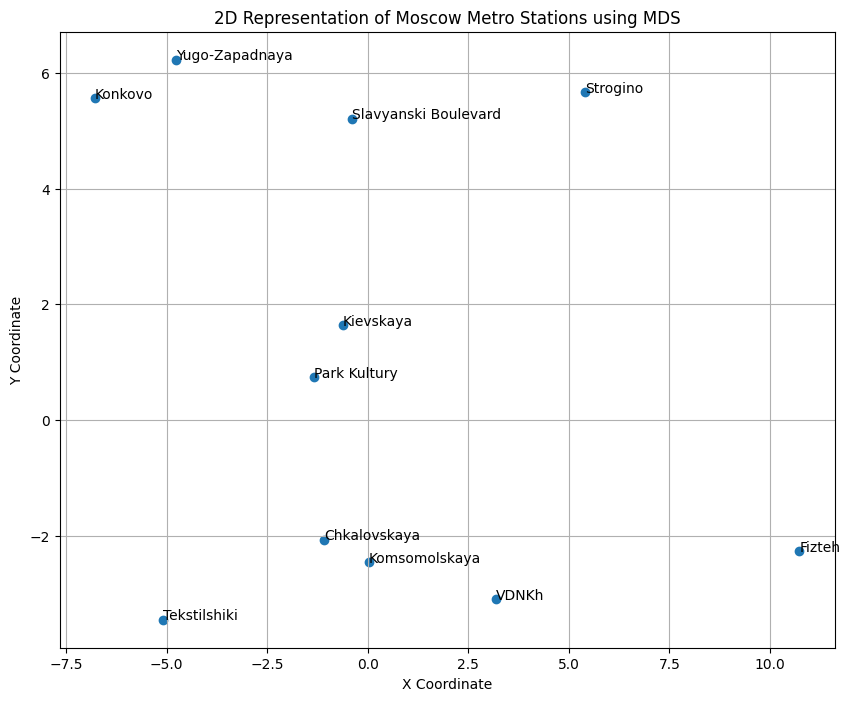

In [9]:
import matplotlib.pyplot as plt

def gradient_descent_mds(D, dimensions=2, learning_rate=0.01, iterations=1000):
    """
    Perform Multidimensional Scaling using Gradient Descent.

    :param D: NxN distance matrix.
    :param dimensions: Number of dimensions for the output coordinates.
    :param learning_rate: Learning rate for gradient descent.
    :param iterations: Number of iterations.
    :return: Nx2 matrix of coordinates.
    """
    N = D.shape[0]
    # Random initialization of coordinates
    X = np.random.rand(N, dimensions)

    for iteration in range(iterations):
        # Compute distance matrix for current coordinates
        D_hat = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=2))

        # Compute gradient
        delta = D_hat - D
        for i in range(N):
            for j in range(N):
                if i != j:
                    grad = (delta[i, j] / D_hat[i, j]) * (X[i, :] - X[j, :])
                    X[i, :] -= learning_rate * grad

    return X

# Perform MDS
coordinates_mds = gradient_descent_mds(distance_matrix)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(coordinates_mds[:, 0], coordinates_mds[:, 1])
for i, name in enumerate(station_names):
    plt.annotate(name, (coordinates_mds[i, 0], coordinates_mds[i, 1]))
plt.title("2D Representation of Moscow Metro Stations using MDS")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


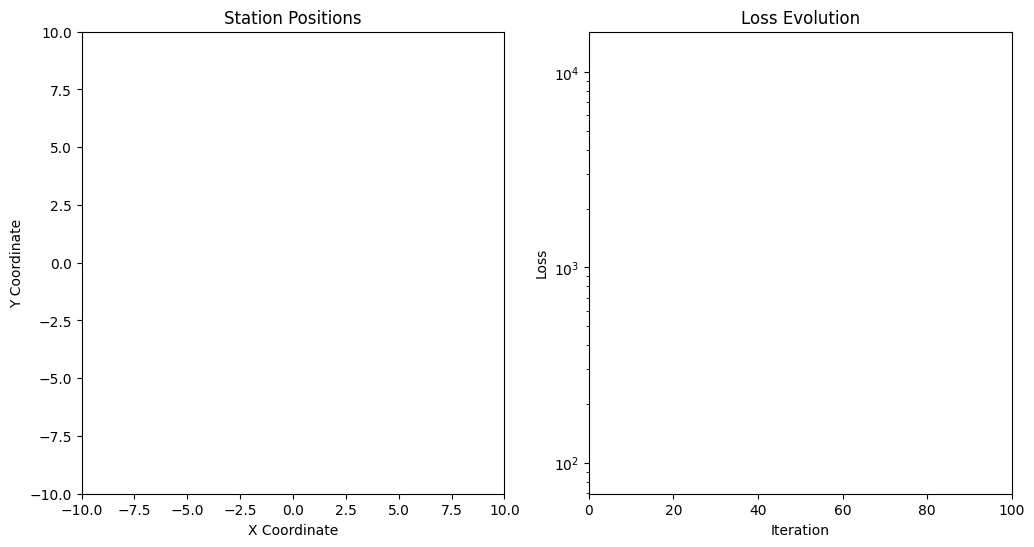

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from geopy.distance import geodesic

# Estimated GPS coordinates for the specified Moscow Metro stations
stations_coordinates = {
    "Fizteh": (55.5518, 37.3247),
    "Chkalovskaya": (55.4523, 37.3926),
    "Slavyanski Boulevard": (55.4347, 37.2814),
    "Park Kultury": (55.4409, 37.3529),
    "Komsomolskaya": (55.4629, 37.3918),
    "Yugo-Zapadnaya": (55.3949, 37.2900),
    "Kievskaya": (55.4440, 37.3356),
    "Strogino": (55.4814, 37.2411),
    "Konkovo": (55.3800, 37.3108),
    "VDNKh": (55.4916, 37.3828),
    "Tekstilshiki": (55.4232, 37.4354)
}

# Calculate the pairwise distance matrix
def calculate_distance_matrix(coords_dict):
    station_names = list(coords_dict.keys())
    n_stations = len(station_names)
    distance_matrix = np.zeros((n_stations, n_stations))

    for i in range(n_stations):
        for j in range(n_stations):
            if i != j:
                distance_matrix[i][j] = geodesic(coords_dict[station_names[i]], coords_dict[station_names[j]]).kilometers
            else:
                distance_matrix[i][j] = 0

    return station_names, distance_matrix

station_names, distance_matrix = calculate_distance_matrix(stations_coordinates)

# Gradient Descent MDS with data collection for animation
def gradient_descent_mds(D, dimensions=2, learning_rate=0.01, iterations=1000):
    N = D.shape[0]
    X = np.random.rand(N, dimensions)

    # Records for animation
    positions_record = []
    loss_record = []

    for iteration in range(iterations):
        D_hat = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=2))
        delta = D_hat - D
        loss = np.sum(delta**2)  # Loss calculation
        positions_record.append(X.copy())
        loss_record.append(loss)

        # Gradient descent update
        for i in range(N):
            for j in range(N):
                if i != j:
                    grad = (delta[i, j] / D_hat[i, j]) * (X[i, :] - X[j, :])
                    X[i, :] -= learning_rate * grad

    return positions_record, loss_record

# Perform MDS and collect data for animation
positions_record, loss_record = gradient_descent_mds(distance_matrix, iterations=100)

# Function to update each frame in the animation
def update_frame(num, positions_record, loss_record, station_names, scat, line, ax1, ax2):
    # Clear previous station labels and tails
    ax1.clear()
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.set_title('Station Positions')
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')

    # Update station positions and draw tails
    scat.set_offsets(positions_record[num])
    for i, name in enumerate(station_names):
        # Draw the tail for each station
        if num > 0:
            for past in range(num):
                ax1.plot([positions_record[past][i, 0], positions_record[past+1][i, 0]],
                         [positions_record[past][i, 1], positions_record[past+1][i, 1]],
                         color='gray', alpha=0.5)

        # Label the final position of the station
        if num == len(positions_record) - 1:
            ax1.text(positions_record[num][i, 0], positions_record[num][i, 1], name, fontsize=8)

    # Update loss evolution plot
    line.set_data(range(num + 1), loss_record[:num + 1])
    ax2.set_xlim(0, 100)
    ax2.set_ylim(min(loss_record), max(loss_record))
    ax2.set_title('Loss Evolution')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')

    return scat, line

# Create the figure for animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for station positions
scat = ax1.scatter([], [], s=30)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)
ax1.set_title('Station Positions')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')

# Line plot for loss evolution
line, = ax2.semilogy([], [], lw=2)
ax2.set_xlim(0, 100)
ax2.set_ylim(min(loss_record), max(loss_record))
ax2.set_title('Loss Evolution')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')

# Creating the animation
ani = animation.FuncAnimation(fig, update_frame, frames=100, fargs=(positions_record, loss_record, station_names, scat, line, ax1, ax2), blit=False, repeat=False)

# Saving the animation
ani.save('moscow_metro_mds_animation.mp4', writer='ffmpeg', fps=10)


In [4]:
positions_record[-1]

array([[ 8.02981262,  8.63001461],
       [ 2.25518938, -2.67734712],
       [-3.33834951,  1.74376926],
       [-0.07801013, -1.44497825],
       [ 3.09715112, -2.01602395],
       [-6.46246911, -1.07594008],
       [-0.48882653, -0.35399986],
       [-1.32473107,  7.16441546],
       [-6.86842661, -3.2663034 ],
       [ 5.7281098 ,  1.15859194],
       [ 4.50067386, -4.182293  ]])

In [19]:
np.max()

100